# GUT of Imaging Results


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

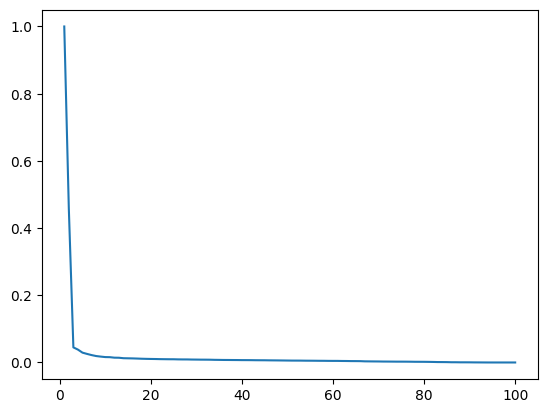

In [ ]:
from guti.data_utils import load_all_svds
from guti.core import get_bitrate, noise_floor_heuristic

# Load all SVD spectrums
all_svds = load_all_svds()

# Plot all spectrums
for modality_name, (s, params) in all_svds.items():
    plt.plot(
        np.arange(1, len(s) + 1),
        s / s[0],
        label=modality_name,
    )
    # if True or (params and params.noise_full_brain is not None):
    #     noise_full_brain = noise_floor_heuristic(s, "first", factor=50) if not params or not params.noise_full_brain else params.noise_full_brain
    #     n_detectors = params.num_sensors if params else None
    #     time_resolution = (params.time_resolution or 1.) if params else 1.
    #     bitrate = get_bitrate(s, noise_full_brain, time_resolution, n_detectors)
    #     print(f"{modality_name}: {bitrate:.1f} bits/s")
        # # Plot noise level as dotted line
        # noise_level = noise_full_brain / (n_detectors ** 0.5 if n_detectors else 1) / s[0]
        # plt.axhline(y=noise_level, color=plt.gca().lines[-1].get_color(), 
        #             linestyle='--', alpha=0.7, 
        #             label=f'{modality_name} noise level')
        
        # # Add bitrate text annotation
        # plt.text(len(s) * 0.7, noise_level * 2, 
        #         f'{bitrate:.1f} bits/s', 
        #         color=plt.gca().lines[-1].get_color(),
        #         fontsize=10, alpha=0.8)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.title("Spectrum of Imaging Modalities")
plt.legend()
plt.savefig("spectrum.png")
plt.ylim(1e-5, 1)
plt.show()